# Exploratory analysis - Instacart

*Lara Cobler Moncunill*

Exploratory analysis of Instacart dataset found at: (https://www.instacart.com/datasets/grocery-shopping-2017).

## Read the data

Let's have a look at the datasets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
order = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
order_products = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

In [5]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## When do people order?
When people use to order groceries online

### Day of the week
From the data set we don't know what days of the week corresponds each value.
Online buyers order on days 0 and 1. I assume that those corresponds to Saturday and Sunday.


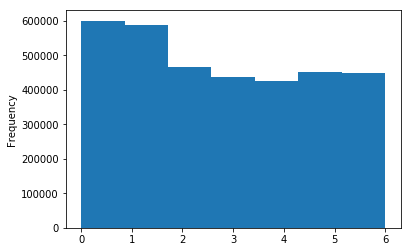

In [11]:
%matplotlib inline
order['order_dow'].plot.hist(bins=7)

### Hour of the day
Most orders are between 8.00 and 18.00

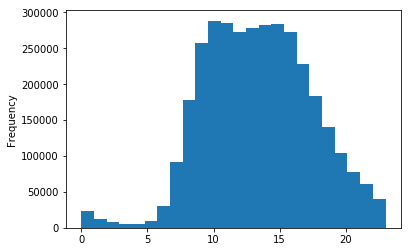

In [12]:
order['order_hour_of_day'].plot.hist(bins=24)

### Do online buyers order at different hour of the day depending on the day of the week?
Seems that on Saturday (day 0) most orders are produced between 13.00 and 15.00 whereas on Sunday (day 1) the peak is between 9.00 and 11.00. During the week days, the trend is similar all days.

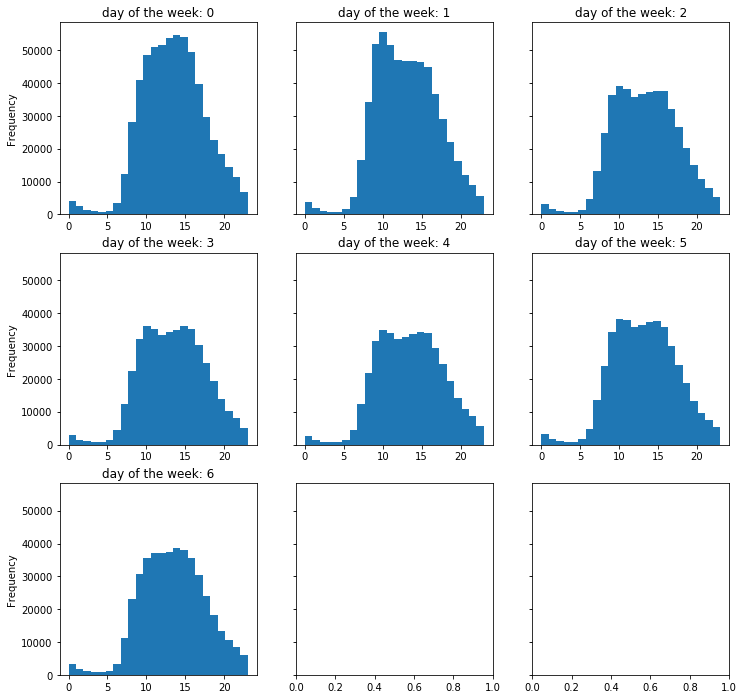

In [13]:
order_dow=order.groupby('order_dow')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12), sharey=True)

for (key, ax) in zip(order_dow.groups.keys(), axes.flatten()):
    order_dow['order_hour_of_day'].get_group(key).plot.hist(ax=ax,bins=24,title='day of the week: %d'%key)

plt.show()

## Most ordered products
Top 10 ordered and reordered products. As expected, most ordered products are also the most reordered. 

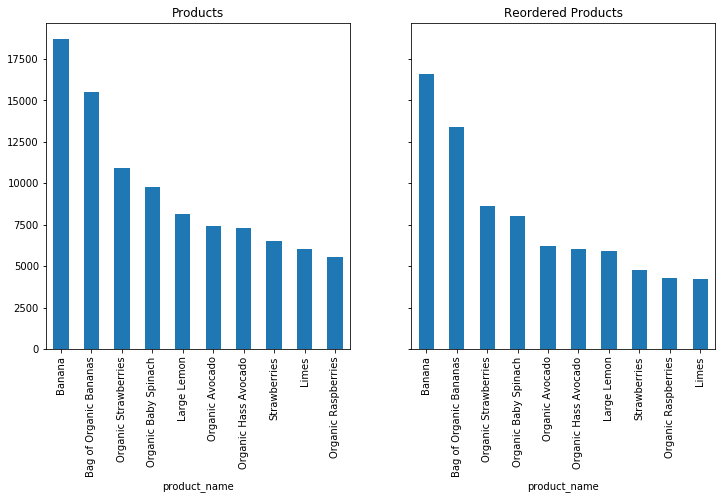

In [20]:
order_products_products = pd.merge(order_products,products,on='product_id')
top10_products=order_products_products[['product_name','product_id']].groupby(['product_name'])['product_id'].count().nlargest(10)
reorder_products=order_products_products.loc[order_products_products['reordered']==1] 
top10_reordered_products=reorder_products[['product_name','product_id']].groupby(['product_name'])['product_id'].count().nlargest(10)

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6), sharey=True)
top10_products.plot.bar(ax=axes[0],title='Products')
top10_reordered_products.plot.bar(ax=axes[1], title='Reordered Products')
plt.show()

### By aisle

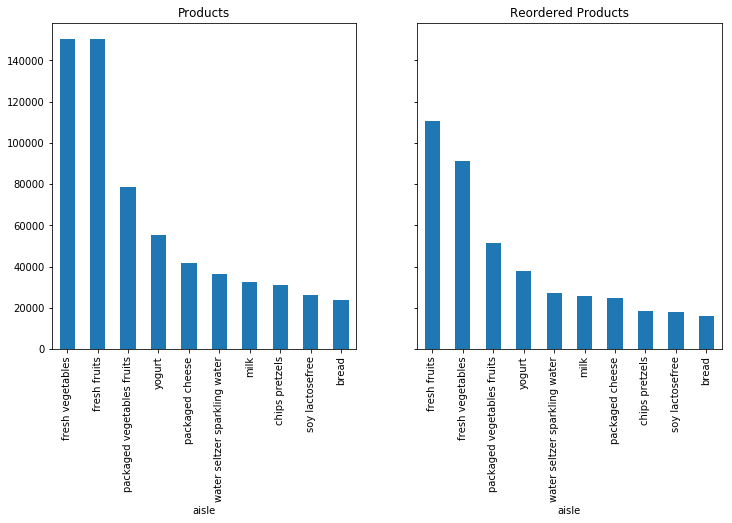

In [21]:
order_products_products_aisles = pd.merge(order_products_products,aisles,on='aisle_id')
top10_aisles=order_products_products_aisles[['aisle','aisle_id']].groupby(['aisle'])['aisle_id'].count().nlargest(10)
reorder_aisles=order_products_products_aisles.loc[order_products_products_aisles['reordered']==1] 
top10_reordered_aisles=reorder_aisles[['aisle','aisle_id']].groupby(['aisle'])['aisle_id'].count().nlargest(10)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6), sharey=True)
top10_aisles.plot.bar(ax=axes[0],title='Products')
top10_reordered_aisles.plot.bar(ax=axes[1], title='Reordered Products')
plt.show()

### By department

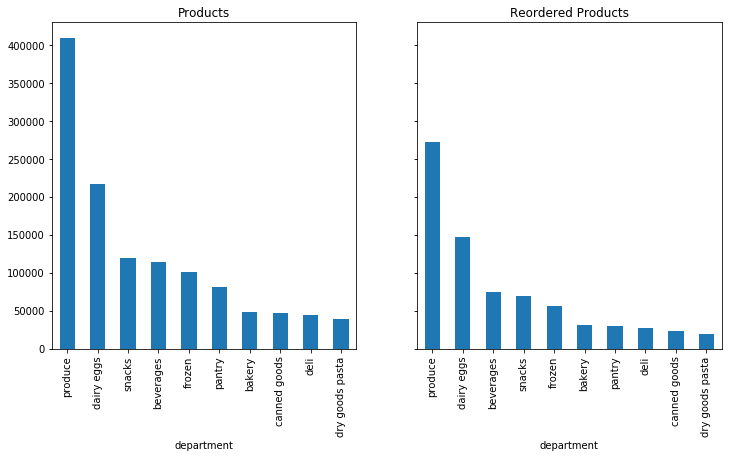

In [22]:
order_products_products_departments = pd.merge(order_products_products,departments,on='department_id')
top10_departments=order_products_products_departments[['department','department_id']].groupby(['department'])['department_id'].count().nlargest(10)
reorder_departments=order_products_products_departments.loc[order_products_products_departments['reordered']==1] 
top10_reordered_departments=reorder_departments[['department','department_id']].groupby(['department'])['department_id'].count().nlargest(10)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6), sharey=True)
top10_departments.plot.bar(ax=axes[0],title='Products')
top10_reordered_departments.plot.bar(ax=axes[1], title='Reordered Products')
plt.show()

## Do people buys different products depending on the day of the week?
Looks like Instacart costumers order the same products every day of the week.

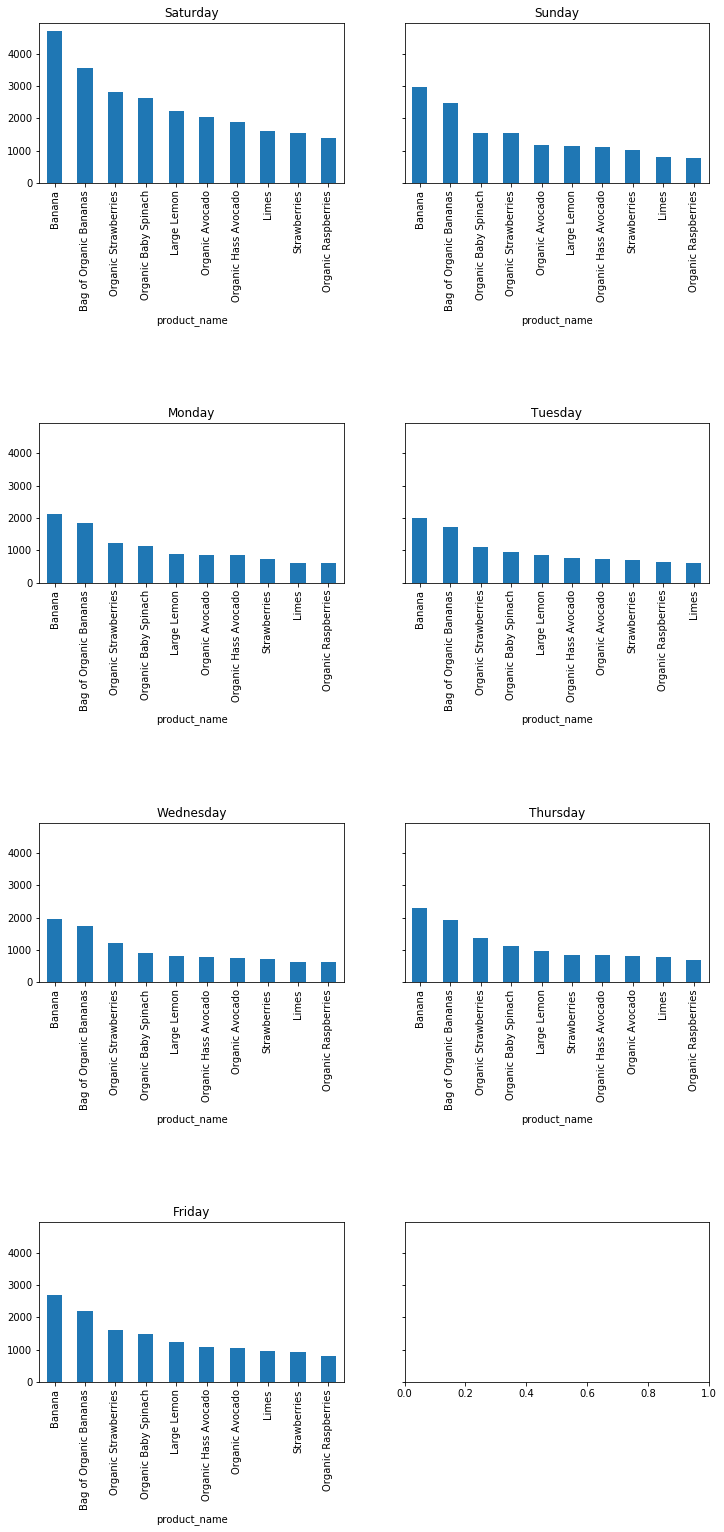

In [17]:
order_plus_products = pd.merge(order,order_products_products,on='order_id')

saturday_products=order_plus_products.loc[order_plus_products['order_dow']==0] 
sunday_products=order_plus_products.loc[order_plus_products['order_dow']==1]
monday_products=order_plus_products.loc[order_plus_products['order_dow']==2]
tuesday_products=order_plus_products.loc[order_plus_products['order_dow']==3]
wednesday_products=order_plus_products.loc[order_plus_products['order_dow']==4]
thursday_products=order_plus_products.loc[order_plus_products['order_dow']==5]
friday_products=order_plus_products.loc[order_plus_products['order_dow']==6]

top10_saturday=saturday_products[['product_name','product_id']].groupby(['product_name'])['product_id'].count().nlargest(10)
top10_sunday=sunday_products[['product_name','product_id']].groupby(['product_name'])['product_id'].count().nlargest(10)
top10_monday=monday_products[['product_name','product_id']].groupby(['product_name'])['product_id'].count().nlargest(10)
top10_tuesday=tuesday_products[['product_name','product_id']].groupby(['product_name'])['product_id'].count().nlargest(10)
top10_wednesday=wednesday_products[['product_name','product_id']].groupby(['product_name'])['product_id'].count().nlargest(10)
top10_thurday=thursday_products[['product_name','product_id']].groupby(['product_name'])['product_id'].count().nlargest(10)
top10_friday=friday_products[['product_name','product_id']].groupby(['product_name'])['product_id'].count().nlargest(10)

fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(12,25), sharey=True)

top10_saturday.plot.bar(ax=axes[0,0],title='Saturday')
top10_sunday.plot.bar(ax=axes[0,1], title='Sunday')
top10_monday.plot.bar(ax=axes[1,0],title='Monday')
top10_tuesday.plot.bar(ax=axes[1,1], title='Tuesday')
top10_wednesday.plot.bar(ax=axes[2,0],title='Wednesday')
top10_thurday.plot.bar(ax=axes[2,1], title='Thursday')
top10_friday.plot.bar(ax=axes[3,0], title='Friday')

plt.subplots_adjust(hspace=1.5)
plt.show()